In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [3]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

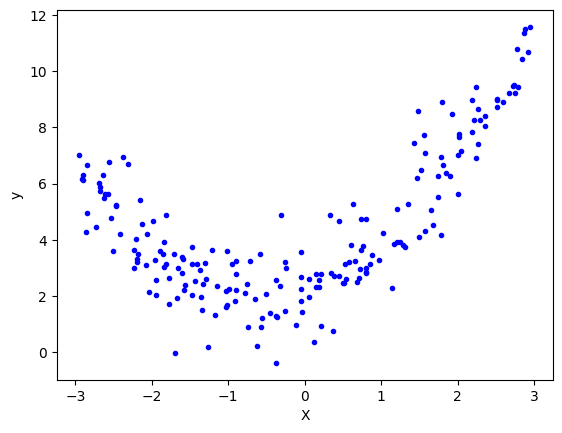

In [4]:
plt.plot(X,y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.3801773581133029

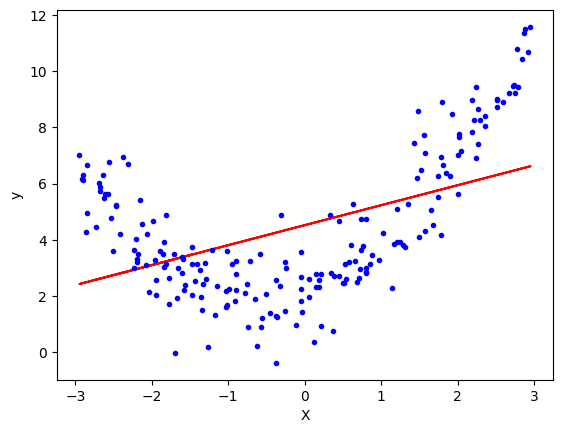

In [10]:
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [33]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

In [34]:
print(X_train[1])
print(X_train_trans[1])
print(X_test_trans[0])

[-0.75859724]
[-0.75859724  0.57546977]
[1.56057851 2.43540528]


In [35]:
lr.fit(X_train_trans, y_train)

LinearRegression()

In [36]:
y_pred = lr.predict(X_test_trans)

In [37]:
r2_score(y_test, y_pred)

0.9038776502090023

In [38]:
print(lr.coef_)
print(lr.intercept_)

[[0.83864921 0.73865832]]
[2.33580048]


In [47]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

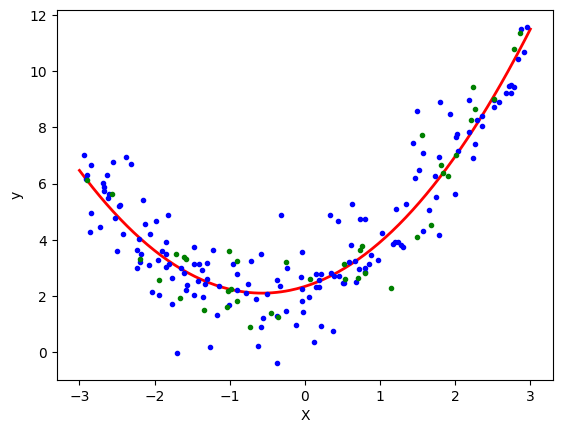

In [49]:
plt.plot(X_new, y_new, "r-",linewidth=2, label='Prediction')
plt.plot(X_train, y_train, "b.", label='Training Points')
plt.plot(X_test, y_test, "g.", label="Testing Points")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [52]:
def polynomial_regression(degree):
    poly_big_features = PolynomialFeatures(degree, include_bias=False)
    
    X_new = np.linspace(-3, 3, 100).reshape(100,1)
   
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    polynomial_regression = Pipeline([
        ("poly_features", poly_big_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    
    polynomial_regression.fit(X,y)
    y_new = polynomial_regression.predict(X_new)
    
    plt.plot(X_new, y_new, 'r', label = "Degree" + str(degree), linewidth =2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.",linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()
    
    
    

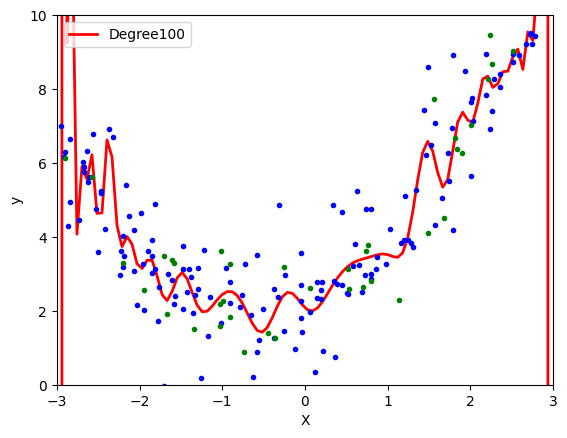

In [55]:
polynomial_regression(100)

In [56]:
poly.powers_

array([[1],
       [2]])

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


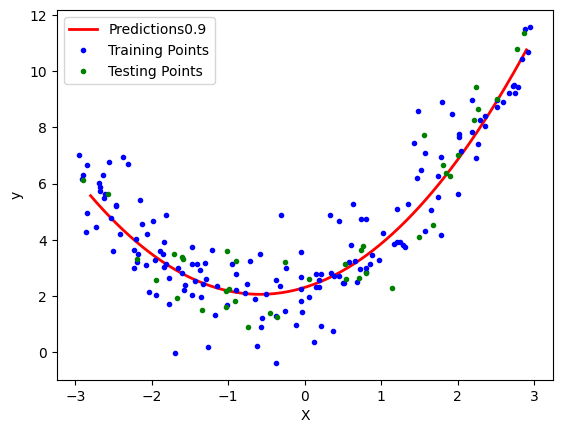

In [57]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor()

sgd.fit(X_train_trans, y_train)

X_new = np.linspace(-2.8, 2.9, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions" + str(round(r2_score(y_test, y_pred), 2)))
plt.plot(X_train, y_train, "b.", label='Training Points')
plt.plot(X_test, y_test, "g.", label="Testing Points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [70]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x +0.2*y + 0.1*x*y + 2 + np.random.randn(100,1)
x.shape

(100, 1)

In [64]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x = x.ravel(), y=y.ravel(),z=z.ravel())
fig.show()

In [76]:
lr = LinearRegression()
lr.fit(np.array([x, y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)

xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

print(z_final)

[[11.39456012 11.09040686 10.78625361 10.48210035 10.1779471   9.87379384
   9.56964058  9.26548733  8.96133407  8.65718082]
 [11.6372887  11.33313544 11.02898219 10.72482893 10.42067567 10.11652242
   9.81236916  9.50821591  9.20406265  8.89990939]
 [11.88001728 11.57586402 11.27171077 10.96755751 10.66340425 10.359251
  10.05509774  9.75094448  9.44679123  9.14263797]
 [12.12274586 11.8185926  11.51443934 11.21028609 10.90613283 10.60197958
  10.29782632  9.99367306  9.68951981  9.38536655]
 [12.36547443 12.06132118 11.75716792 11.45301467 11.14886141 10.84470815
  10.5405549  10.23640164  9.93224839  9.62809513]
 [12.60820301 12.30404976 11.9998965  11.69574324 11.39158999 11.08743673
  10.78328348 10.47913022 10.17497696  9.87082371]
 [12.85093159 12.54677833 12.24262508 11.93847182 11.63431857 11.33016531
  11.02601205 10.7218588  10.41770554 10.11355229]
 [13.09366017 12.78950691 12.48535366 12.1812004  11.87704714 11.57289389
  11.26874063 10.96458738 10.66043412 10.35628086]
 [

In [ ]:
import plotly.graph_objects as go

fig =  px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x = x_input, y = y_input, z = z_final))

fig.show()

In [ ]:
X_multi = np.array([x,y]).reshape(100,2)
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)
X_test_multi = poly.transform(final)

[[ 1.00000000e+00  4.92934876e-02  4.07389994e+00 ...  2.92327135e+14
   2.41596113e+16  1.99669051e+18]
 [ 1.00000000e+00  1.08657580e+00  3.58143447e+00 ...  3.85226645e+15
   1.26973562e+16  4.18514284e+16]
 [ 1.00000000e+00  2.56633296e+00  8.70918351e-01 ...  1.37402414e-01
   4.66292901e-02  1.58242539e-02]
 ...
 [ 1.00000000e+00 -1.34305048e+00  2.35121147e+00 ...  4.49109270e+10
  -7.86233191e+10  1.37641922e+11]
 [ 1.00000000e+00  1.18636562e+00  4.13718904e+00 ...  2.60727805e+17
   9.09230847e+17  3.17074250e+18]
 [ 1.00000000e+00 -1.20465466e+00  3.00450777e+00 ...  3.46240925e+13
  -8.63553337e+13  2.15377303e+14]]


In [84]:
lr.fit(X_multi_trans, z)
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [85]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x=x_input, y=y_input, z = z_final))

fig.update_layout(scene=dict(zaxis = dict(range=[0,35])))

fig.show()